#### Preprocessing

In [1]:
#Import Geoff's Preprocessor
from x_ray import preprocessor 
import pandas as pd

In [2]:
##Create an instance of the class from Geoff's Preprocessor 
##and develop testing & response datasets split into testing and training subsets.  

#Use the function (provide a path, select input labels, and call the function)
csv_path = 'C:/Users/stany/Desktop/project-data-repo/x_ray_1000.csv'  #C:\Users\stany\Desktop
image_path = 'C:/Users/stany/Desktop/project-data-repo/x_ray_1000_images'
input_labels = ['Atelectasis','Cardiomegaly','Consolidation','Effusion','Infiltration','Mass',
               'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumothorax']
# input_labels = ['Cardiomegaly', 'No Finding']

# #Create an instance of the class 
prepper = preprocessor(csv_path, image_path, 100, 100, input_labels)

X_train, X_val, X_test, y_train, y_val, y_test = prepper.prepare_x_ray_data()

Assigning numerical Finding Labels to Finding IDs...
Creating a data frame of the flat image matrics & associated labels and then shuffling...


#### Creating Random Forest Classifier

In [3]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

In [4]:
#Create a Gaussian Classifier 
classifier=RandomForestClassifier(n_estimators=100, random_state=123, oob_score=True) #Note, n_estimators is the number of trees

In [5]:
#Train the model using the training set, X_train, y_train 
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=123, verbose=0, warm_start=False)

In [6]:
#Save the predictions 
y_pred = classifier.predict(X_test)

#### Evaluating Model using Testing Data

In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [8]:
#Print Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.2225


In [9]:
#Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5,1,'Confusion Matrix')

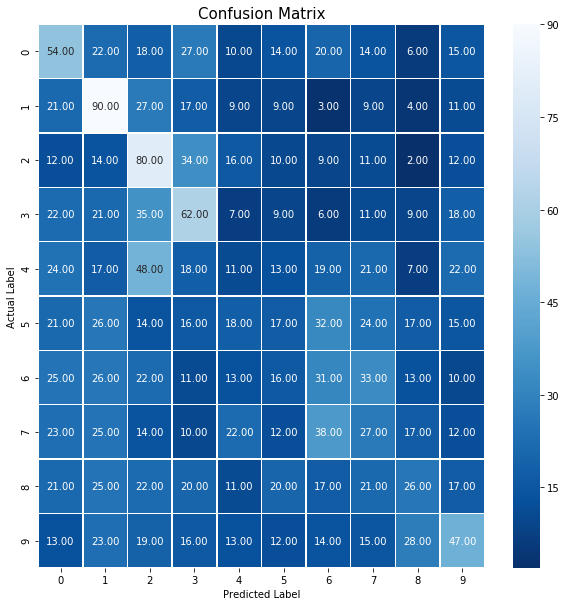

In [10]:
#Create Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = False, cmap = 'Blues_r', xticklabels=True,yticklabels=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 15)

In [11]:
#Other classification metrics
print("Error Score:",1-metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred, average = "micro"))
print("Recall:",metrics.recall_score(y_test,y_pred, average = "micro"))
print("F1 Score:",metrics.f1_score(y_test,y_pred, average = "micro"))

Error Score: 0.7775
Precision: 0.2225
Recall: 0.2225
F1 Score: 0.2225


In [12]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [13]:
#ROC AUC Score (Testing)
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"): 
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test) 
  y_pred = lb.transform(y_pred) 
  return roc_auc_score(y_test, y_pred, average=average)

multiclass_roc_auc_score(y_test, y_pred, average="macro")

0.56805555555555565

In [16]:
#ROC Curves (Testing)
def multiclass_roc_curve(y_test, y_pred, average="macro"): 
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(10):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  return fpr, tpr, roc_auc


fpr, tpr, roc_auc = multiclass_roc_curve(y_test, y_pred, average="macro")

In [17]:
import matplotlib.pyplot as plt

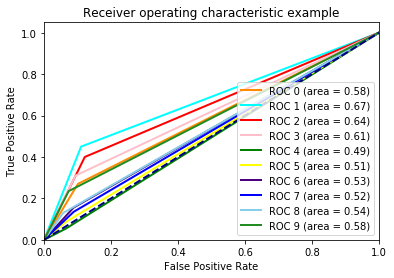

In [19]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1],tpr[1], color='cyan',
         lw=lw, label='ROC 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2],tpr[2],color='red',
         lw=lw, label= 'ROC 2 (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3],tpr[3],color='pink',
         lw=lw, label = 'ROC 3 (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4],tpr[4],color='green',
         lw=lw, label = 'ROC 4 (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5],tpr[5],color='yellow', 
         lw=lw, label = 'ROC 5 (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6],tpr[6],color='indigo', 
         lw=lw, label = 'ROC 6 (area = %0.2f)' % roc_auc[6])
plt.plot(fpr[7],tpr[7],color='blue',
         lw=lw, label = 'ROC 7 (area = %0.2f)' % roc_auc[7])
plt.plot(fpr[8],tpr[8],color='skyblue',
         lw=lw, label = 'ROC 8 (area = %0.2f)' % roc_auc[8])
plt.plot(fpr[9],tpr[9],color='forestgreen',
         lw=lw, label = 'ROC 9 (area = %0.2f)' % roc_auc[9])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

#### Evaluating Model on Training Data

In [20]:
#New Predictions using Training Data
#Save the predictions 
y_pred = classifier.predict(X_train)

In [21]:
#Print Model Accuracy, how often is the classifier correct? 
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


Text(0.5,1,'Confusion Matrix')

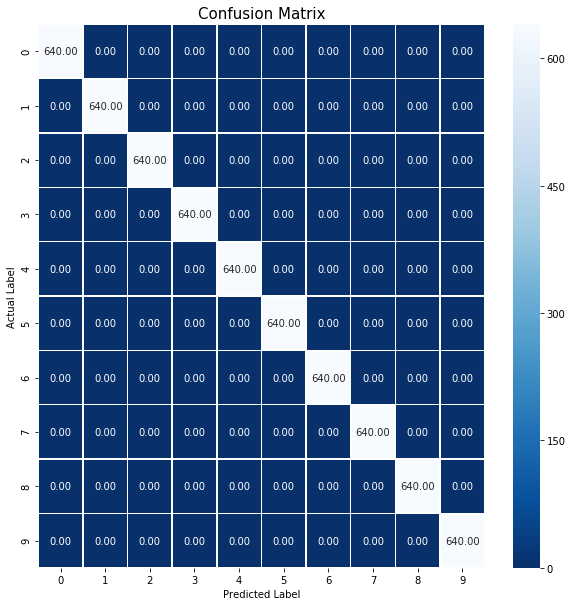

In [22]:
#Create Confusion Matrix (Training)
cm = metrics.confusion_matrix(y_train, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=0.5, square = False, cmap = 'Blues_r', xticklabels=True,yticklabels=True)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix', size = 15)

In [23]:
#Other classification metrics (Training)
print("Error Score:",1-metrics.accuracy_score(y_train,y_pred))
print("Precision:",metrics.precision_score(y_train,y_pred, average = "micro"))
print("Recall:",metrics.recall_score(y_train,y_pred, average = "micro"))
print("F1 Score:",metrics.f1_score(y_train,y_pred, average = "micro"))

Error Score: 0.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [26]:
#ROC AUC Score (Training)

def multiclass_roc_auc_score(y_train, y_pred, average="macro"): 
  lb = LabelBinarizer()
  lb.fit(y_train)
  y_train = lb.transform(y_train) 
  y_pred = lb.transform(y_pred) 
  return roc_auc_score(y_train, y_pred, average=average)

multiclass_roc_auc_score(y_train, y_pred, average="macro")

1.0

In [29]:
#ROC Curves (Training)
def multiclass_roc_curve(y_train, y_pred, average="macro"): 
  lb = LabelBinarizer()
  lb.fit(y_train)
  y_train = lb.transform(y_train)
  y_pred = lb.transform(y_pred)
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(10):
      fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  return fpr, tpr, roc_auc


fpr, tpr, roc_auc = multiclass_roc_curve(y_train, y_pred, average="macro")

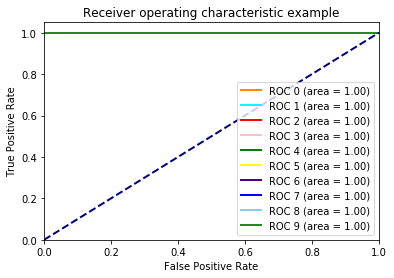

In [30]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC 0 (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1],tpr[1], color='cyan',
         lw=lw, label='ROC 1 (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2],tpr[2],color='red',
         lw=lw, label= 'ROC 2 (area = %0.2f)' % roc_auc[2])
plt.plot(fpr[3],tpr[3],color='pink',
         lw=lw, label = 'ROC 3 (area = %0.2f)' % roc_auc[3])
plt.plot(fpr[4],tpr[4],color='green',
         lw=lw, label = 'ROC 4 (area = %0.2f)' % roc_auc[4])
plt.plot(fpr[5],tpr[5],color='yellow', 
         lw=lw, label = 'ROC 5 (area = %0.2f)' % roc_auc[5])
plt.plot(fpr[6],tpr[6],color='indigo', 
         lw=lw, label = 'ROC 6 (area = %0.2f)' % roc_auc[6])
plt.plot(fpr[7],tpr[7],color='blue',
         lw=lw, label = 'ROC 7 (area = %0.2f)' % roc_auc[7])
plt.plot(fpr[8],tpr[8],color='skyblue',
         lw=lw, label = 'ROC 8 (area = %0.2f)' % roc_auc[8])
plt.plot(fpr[9],tpr[9],color='forestgreen',
         lw=lw, label = 'ROC 9 (area = %0.2f)' % roc_auc[9])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [31]:
from sklearn import svm

In [37]:
SupportVectorMachineClf = svm.SVC(kernel='poly')

In [38]:
SupportVectorMachineClf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_pred = SupportVectorMachineClf.predict(X_test)

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.1605
